# Part 1 : Set Up & Data Preparation

### 1.1 : Project Config -  Read Required libraried and utilities

In [4]:
## Set up working directory
import os
workdir = os.getcwd()
print("The working directory is :", workdir)

The working directory is : C:\Users\sattw\Documents\Github\NLP


In [5]:
import os, sys, string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pickle import dump,load

import tensorflow as tf

In [52]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Bidirectional, Dense, Dropout, Concatenate, TimeDistributed, Add, Layer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K

%load_ext tensorboard
import datetime, os

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


### 1.2 : Configuration 

In [7]:
NUM_SAMPLES      = 10000 # number of samples from the original data.


### 1.3 : Load Data 

In [8]:
## 1.3.1: function to read each document
def load_single_doc(filename):
    with open(filename, encoding = 'utf-8') as f:
        text = f.read()
        f.close()
    return text


In [9]:
## 1.3.2 : function to extract news story and highlights
def extract_story(doc):
    idx = doc.find('@highlight')
    story_part, highlight_part = doc[:idx], doc[idx:].split('@highlight')
    highlight_part = [h.strip() for h in highlight_part if len(h)>0]
    return story_part, highlight_part

In [10]:
## 1.3.3 : function to load all stories from data directory
def load_all_stories(dir):
    stories = list()
    doc_iter = 0
    for files in os.listdir(dir):
        doc_iter += 1
        print("processing doc number {}".format(doc_iter))
        filename = os.path.join(dir, files)
        doc = load_single_doc(filename)
        story_part, highlight_part = extract_story(doc)
        if story_part is not None:
            stories.append({'story': story_part, 'highlight' : highlight_part})
            
        if doc_iter == NUM_SAMPLES:
            break
    return stories


In [12]:
# load stories
dir = os.path.join(workdir, 'Data', 'stories_text_summarization_dataset_train') 
stories = load_all_stories(dir)
print('Loaded Stories %d' % len(stories))

processing doc number 1
processing doc number 2
processing doc number 3
processing doc number 4
processing doc number 5
processing doc number 6
processing doc number 7
processing doc number 8
processing doc number 9
processing doc number 10
processing doc number 11
processing doc number 12
processing doc number 13
processing doc number 14
processing doc number 15
processing doc number 16
processing doc number 17
processing doc number 18
processing doc number 19
processing doc number 20
processing doc number 21
processing doc number 22
processing doc number 23
processing doc number 24
processing doc number 25
processing doc number 26
processing doc number 27
processing doc number 28
processing doc number 29
processing doc number 30
processing doc number 31
processing doc number 32
processing doc number 33
processing doc number 34
processing doc number 35
processing doc number 36
processing doc number 37
processing doc number 38
processing doc number 39
processing doc number 40
processin

processing doc number 538
processing doc number 539
processing doc number 540
processing doc number 541
processing doc number 542
processing doc number 543
processing doc number 544
processing doc number 545
processing doc number 546
processing doc number 547
processing doc number 548
processing doc number 549
processing doc number 550
processing doc number 551
processing doc number 552
processing doc number 553
processing doc number 554
processing doc number 555
processing doc number 556
processing doc number 557
processing doc number 558
processing doc number 559
processing doc number 560
processing doc number 561
processing doc number 562
processing doc number 563
processing doc number 564
processing doc number 565
processing doc number 566
processing doc number 567
processing doc number 568
processing doc number 569
processing doc number 570
processing doc number 571
processing doc number 572
processing doc number 573
processing doc number 574
processing doc number 575
processing d

processing doc number 992
processing doc number 993
processing doc number 994
processing doc number 995
processing doc number 996
processing doc number 997
processing doc number 998
processing doc number 999
processing doc number 1000
processing doc number 1001
processing doc number 1002
processing doc number 1003
processing doc number 1004
processing doc number 1005
processing doc number 1006
processing doc number 1007
processing doc number 1008
processing doc number 1009
processing doc number 1010
processing doc number 1011
processing doc number 1012
processing doc number 1013
processing doc number 1014
processing doc number 1015
processing doc number 1016
processing doc number 1017
processing doc number 1018
processing doc number 1019
processing doc number 1020
processing doc number 1021
processing doc number 1022
processing doc number 1023
processing doc number 1024
processing doc number 1025
processing doc number 1026
processing doc number 1027
processing doc number 1028
processin

processing doc number 1403
processing doc number 1404
processing doc number 1405
processing doc number 1406
processing doc number 1407
processing doc number 1408
processing doc number 1409
processing doc number 1410
processing doc number 1411
processing doc number 1412
processing doc number 1413
processing doc number 1414
processing doc number 1415
processing doc number 1416
processing doc number 1417
processing doc number 1418
processing doc number 1419
processing doc number 1420
processing doc number 1421
processing doc number 1422
processing doc number 1423
processing doc number 1424
processing doc number 1425
processing doc number 1426
processing doc number 1427
processing doc number 1428
processing doc number 1429
processing doc number 1430
processing doc number 1431
processing doc number 1432
processing doc number 1433
processing doc number 1434
processing doc number 1435
processing doc number 1436
processing doc number 1437
processing doc number 1438
processing doc number 1439
p

processing doc number 1819
processing doc number 1820
processing doc number 1821
processing doc number 1822
processing doc number 1823
processing doc number 1824
processing doc number 1825
processing doc number 1826
processing doc number 1827
processing doc number 1828
processing doc number 1829
processing doc number 1830
processing doc number 1831
processing doc number 1832
processing doc number 1833
processing doc number 1834
processing doc number 1835
processing doc number 1836
processing doc number 1837
processing doc number 1838
processing doc number 1839
processing doc number 1840
processing doc number 1841
processing doc number 1842
processing doc number 1843
processing doc number 1844
processing doc number 1845
processing doc number 1846
processing doc number 1847
processing doc number 1848
processing doc number 1849
processing doc number 1850
processing doc number 1851
processing doc number 1852
processing doc number 1853
processing doc number 1854
processing doc number 1855
p

processing doc number 2236
processing doc number 2237
processing doc number 2238
processing doc number 2239
processing doc number 2240
processing doc number 2241
processing doc number 2242
processing doc number 2243
processing doc number 2244
processing doc number 2245
processing doc number 2246
processing doc number 2247
processing doc number 2248
processing doc number 2249
processing doc number 2250
processing doc number 2251
processing doc number 2252
processing doc number 2253
processing doc number 2254
processing doc number 2255
processing doc number 2256
processing doc number 2257
processing doc number 2258
processing doc number 2259
processing doc number 2260
processing doc number 2261
processing doc number 2262
processing doc number 2263
processing doc number 2264
processing doc number 2265
processing doc number 2266
processing doc number 2267
processing doc number 2268
processing doc number 2269
processing doc number 2270
processing doc number 2271
processing doc number 2272
p

processing doc number 2706
processing doc number 2707
processing doc number 2708
processing doc number 2709
processing doc number 2710
processing doc number 2711
processing doc number 2712
processing doc number 2713
processing doc number 2714
processing doc number 2715
processing doc number 2716
processing doc number 2717
processing doc number 2718
processing doc number 2719
processing doc number 2720
processing doc number 2721
processing doc number 2722
processing doc number 2723
processing doc number 2724
processing doc number 2725
processing doc number 2726
processing doc number 2727
processing doc number 2728
processing doc number 2729
processing doc number 2730
processing doc number 2731
processing doc number 2732
processing doc number 2733
processing doc number 2734
processing doc number 2735
processing doc number 2736
processing doc number 2737
processing doc number 2738
processing doc number 2739
processing doc number 2740
processing doc number 2741
processing doc number 2742
p

processing doc number 3195
processing doc number 3196
processing doc number 3197
processing doc number 3198
processing doc number 3199
processing doc number 3200
processing doc number 3201
processing doc number 3202
processing doc number 3203
processing doc number 3204
processing doc number 3205
processing doc number 3206
processing doc number 3207
processing doc number 3208
processing doc number 3209
processing doc number 3210
processing doc number 3211
processing doc number 3212
processing doc number 3213
processing doc number 3214
processing doc number 3215
processing doc number 3216
processing doc number 3217
processing doc number 3218
processing doc number 3219
processing doc number 3220
processing doc number 3221
processing doc number 3222
processing doc number 3223
processing doc number 3224
processing doc number 3225
processing doc number 3226
processing doc number 3227
processing doc number 3228
processing doc number 3229
processing doc number 3230
processing doc number 3231
p

processing doc number 3595
processing doc number 3596
processing doc number 3597
processing doc number 3598
processing doc number 3599
processing doc number 3600
processing doc number 3601
processing doc number 3602
processing doc number 3603
processing doc number 3604
processing doc number 3605
processing doc number 3606
processing doc number 3607
processing doc number 3608
processing doc number 3609
processing doc number 3610
processing doc number 3611
processing doc number 3612
processing doc number 3613
processing doc number 3614
processing doc number 3615
processing doc number 3616
processing doc number 3617
processing doc number 3618
processing doc number 3619
processing doc number 3620
processing doc number 3621
processing doc number 3622
processing doc number 3623
processing doc number 3624
processing doc number 3625
processing doc number 3626
processing doc number 3627
processing doc number 3628
processing doc number 3629
processing doc number 3630
processing doc number 3631
p

processing doc number 4085
processing doc number 4086
processing doc number 4087
processing doc number 4088
processing doc number 4089
processing doc number 4090
processing doc number 4091
processing doc number 4092
processing doc number 4093
processing doc number 4094
processing doc number 4095
processing doc number 4096
processing doc number 4097
processing doc number 4098
processing doc number 4099
processing doc number 4100
processing doc number 4101
processing doc number 4102
processing doc number 4103
processing doc number 4104
processing doc number 4105
processing doc number 4106
processing doc number 4107
processing doc number 4108
processing doc number 4109
processing doc number 4110
processing doc number 4111
processing doc number 4112
processing doc number 4113
processing doc number 4114
processing doc number 4115
processing doc number 4116
processing doc number 4117
processing doc number 4118
processing doc number 4119
processing doc number 4120
processing doc number 4121
p

processing doc number 4534
processing doc number 4535
processing doc number 4536
processing doc number 4537
processing doc number 4538
processing doc number 4539
processing doc number 4540
processing doc number 4541
processing doc number 4542
processing doc number 4543
processing doc number 4544
processing doc number 4545
processing doc number 4546
processing doc number 4547
processing doc number 4548
processing doc number 4549
processing doc number 4550
processing doc number 4551
processing doc number 4552
processing doc number 4553
processing doc number 4554
processing doc number 4555
processing doc number 4556
processing doc number 4557
processing doc number 4558
processing doc number 4559
processing doc number 4560
processing doc number 4561
processing doc number 4562
processing doc number 4563
processing doc number 4564
processing doc number 4565
processing doc number 4566
processing doc number 4567
processing doc number 4568
processing doc number 4569
processing doc number 4570
p

processing doc number 5011
processing doc number 5012
processing doc number 5013
processing doc number 5014
processing doc number 5015
processing doc number 5016
processing doc number 5017
processing doc number 5018
processing doc number 5019
processing doc number 5020
processing doc number 5021
processing doc number 5022
processing doc number 5023
processing doc number 5024
processing doc number 5025
processing doc number 5026
processing doc number 5027
processing doc number 5028
processing doc number 5029
processing doc number 5030
processing doc number 5031
processing doc number 5032
processing doc number 5033
processing doc number 5034
processing doc number 5035
processing doc number 5036
processing doc number 5037
processing doc number 5038
processing doc number 5039
processing doc number 5040
processing doc number 5041
processing doc number 5042
processing doc number 5043
processing doc number 5044
processing doc number 5045
processing doc number 5046
processing doc number 5047
p

processing doc number 5480
processing doc number 5481
processing doc number 5482
processing doc number 5483
processing doc number 5484
processing doc number 5485
processing doc number 5486
processing doc number 5487
processing doc number 5488
processing doc number 5489
processing doc number 5490
processing doc number 5491
processing doc number 5492
processing doc number 5493
processing doc number 5494
processing doc number 5495
processing doc number 5496
processing doc number 5497
processing doc number 5498
processing doc number 5499
processing doc number 5500
processing doc number 5501
processing doc number 5502
processing doc number 5503
processing doc number 5504
processing doc number 5505
processing doc number 5506
processing doc number 5507
processing doc number 5508
processing doc number 5509
processing doc number 5510
processing doc number 5511
processing doc number 5512
processing doc number 5513
processing doc number 5514
processing doc number 5515
processing doc number 5516
p

processing doc number 5973
processing doc number 5974
processing doc number 5975
processing doc number 5976
processing doc number 5977
processing doc number 5978
processing doc number 5979
processing doc number 5980
processing doc number 5981
processing doc number 5982
processing doc number 5983
processing doc number 5984
processing doc number 5985
processing doc number 5986
processing doc number 5987
processing doc number 5988
processing doc number 5989
processing doc number 5990
processing doc number 5991
processing doc number 5992
processing doc number 5993
processing doc number 5994
processing doc number 5995
processing doc number 5996
processing doc number 5997
processing doc number 5998
processing doc number 5999
processing doc number 6000
processing doc number 6001
processing doc number 6002
processing doc number 6003
processing doc number 6004
processing doc number 6005
processing doc number 6006
processing doc number 6007
processing doc number 6008
processing doc number 6009
p

processing doc number 6498
processing doc number 6499
processing doc number 6500
processing doc number 6501
processing doc number 6502
processing doc number 6503
processing doc number 6504
processing doc number 6505
processing doc number 6506
processing doc number 6507
processing doc number 6508
processing doc number 6509
processing doc number 6510
processing doc number 6511
processing doc number 6512
processing doc number 6513
processing doc number 6514
processing doc number 6515
processing doc number 6516
processing doc number 6517
processing doc number 6518
processing doc number 6519
processing doc number 6520
processing doc number 6521
processing doc number 6522
processing doc number 6523
processing doc number 6524
processing doc number 6525
processing doc number 6526
processing doc number 6527
processing doc number 6528
processing doc number 6529
processing doc number 6530
processing doc number 6531
processing doc number 6532
processing doc number 6533
processing doc number 6534
p

processing doc number 6922
processing doc number 6923
processing doc number 6924
processing doc number 6925
processing doc number 6926
processing doc number 6927
processing doc number 6928
processing doc number 6929
processing doc number 6930
processing doc number 6931
processing doc number 6932
processing doc number 6933
processing doc number 6934
processing doc number 6935
processing doc number 6936
processing doc number 6937
processing doc number 6938
processing doc number 6939
processing doc number 6940
processing doc number 6941
processing doc number 6942
processing doc number 6943
processing doc number 6944
processing doc number 6945
processing doc number 6946
processing doc number 6947
processing doc number 6948
processing doc number 6949
processing doc number 6950
processing doc number 6951
processing doc number 6952
processing doc number 6953
processing doc number 6954
processing doc number 6955
processing doc number 6956
processing doc number 6957
processing doc number 6958
p

processing doc number 7360
processing doc number 7361
processing doc number 7362
processing doc number 7363
processing doc number 7364
processing doc number 7365
processing doc number 7366
processing doc number 7367
processing doc number 7368
processing doc number 7369
processing doc number 7370
processing doc number 7371
processing doc number 7372
processing doc number 7373
processing doc number 7374
processing doc number 7375
processing doc number 7376
processing doc number 7377
processing doc number 7378
processing doc number 7379
processing doc number 7380
processing doc number 7381
processing doc number 7382
processing doc number 7383
processing doc number 7384
processing doc number 7385
processing doc number 7386
processing doc number 7387
processing doc number 7388
processing doc number 7389
processing doc number 7390
processing doc number 7391
processing doc number 7392
processing doc number 7393
processing doc number 7394
processing doc number 7395
processing doc number 7396
p

processing doc number 7828
processing doc number 7829
processing doc number 7830
processing doc number 7831
processing doc number 7832
processing doc number 7833
processing doc number 7834
processing doc number 7835
processing doc number 7836
processing doc number 7837
processing doc number 7838
processing doc number 7839
processing doc number 7840
processing doc number 7841
processing doc number 7842
processing doc number 7843
processing doc number 7844
processing doc number 7845
processing doc number 7846
processing doc number 7847
processing doc number 7848
processing doc number 7849
processing doc number 7850
processing doc number 7851
processing doc number 7852
processing doc number 7853
processing doc number 7854
processing doc number 7855
processing doc number 7856
processing doc number 7857
processing doc number 7858
processing doc number 7859
processing doc number 7860
processing doc number 7861
processing doc number 7862
processing doc number 7863
processing doc number 7864
p

processing doc number 8253
processing doc number 8254
processing doc number 8255
processing doc number 8256
processing doc number 8257
processing doc number 8258
processing doc number 8259
processing doc number 8260
processing doc number 8261
processing doc number 8262
processing doc number 8263
processing doc number 8264
processing doc number 8265
processing doc number 8266
processing doc number 8267
processing doc number 8268
processing doc number 8269
processing doc number 8270
processing doc number 8271
processing doc number 8272
processing doc number 8273
processing doc number 8274
processing doc number 8275
processing doc number 8276
processing doc number 8277
processing doc number 8278
processing doc number 8279
processing doc number 8280
processing doc number 8281
processing doc number 8282
processing doc number 8283
processing doc number 8284
processing doc number 8285
processing doc number 8286
processing doc number 8287
processing doc number 8288
processing doc number 8289
p

processing doc number 8656
processing doc number 8657
processing doc number 8658
processing doc number 8659
processing doc number 8660
processing doc number 8661
processing doc number 8662
processing doc number 8663
processing doc number 8664
processing doc number 8665
processing doc number 8666
processing doc number 8667
processing doc number 8668
processing doc number 8669
processing doc number 8670
processing doc number 8671
processing doc number 8672
processing doc number 8673
processing doc number 8674
processing doc number 8675
processing doc number 8676
processing doc number 8677
processing doc number 8678
processing doc number 8679
processing doc number 8680
processing doc number 8681
processing doc number 8682
processing doc number 8683
processing doc number 8684
processing doc number 8685
processing doc number 8686
processing doc number 8687
processing doc number 8688
processing doc number 8689
processing doc number 8690
processing doc number 8691
processing doc number 8692
p

processing doc number 9138
processing doc number 9139
processing doc number 9140
processing doc number 9141
processing doc number 9142
processing doc number 9143
processing doc number 9144
processing doc number 9145
processing doc number 9146
processing doc number 9147
processing doc number 9148
processing doc number 9149
processing doc number 9150
processing doc number 9151
processing doc number 9152
processing doc number 9153
processing doc number 9154
processing doc number 9155
processing doc number 9156
processing doc number 9157
processing doc number 9158
processing doc number 9159
processing doc number 9160
processing doc number 9161
processing doc number 9162
processing doc number 9163
processing doc number 9164
processing doc number 9165
processing doc number 9166
processing doc number 9167
processing doc number 9168
processing doc number 9169
processing doc number 9170
processing doc number 9171
processing doc number 9172
processing doc number 9173
processing doc number 9174
p

processing doc number 9642
processing doc number 9643
processing doc number 9644
processing doc number 9645
processing doc number 9646
processing doc number 9647
processing doc number 9648
processing doc number 9649
processing doc number 9650
processing doc number 9651
processing doc number 9652
processing doc number 9653
processing doc number 9654
processing doc number 9655
processing doc number 9656
processing doc number 9657
processing doc number 9658
processing doc number 9659
processing doc number 9660
processing doc number 9661
processing doc number 9662
processing doc number 9663
processing doc number 9664
processing doc number 9665
processing doc number 9666
processing doc number 9667
processing doc number 9668
processing doc number 9669
processing doc number 9670
processing doc number 9671
processing doc number 9672
processing doc number 9673
processing doc number 9674
processing doc number 9675
processing doc number 9676
processing doc number 9677
processing doc number 9678
p

In [13]:
print(stories[0])

{'story': 'It\'s official: U.S. President Barack Obama wants lawmakers to weigh in on whether to use military force in Syria.\n\nObama sent a letter to the heads of the House and Senate on Saturday night, hours after announcing that he believes military action against Syrian targets is the right step to take over the alleged use of chemical weapons.\n\nThe proposed legislation from Obama asks Congress to approve the use of military force "to deter, disrupt, prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction."\n\nIt\'s a step that is set to turn an international crisis into a fierce domestic political battle.\n\nThere are key questions looming over the debate: What did U.N. weapons inspectors find in Syria? What happens if Congress votes no? And how will the Syrian government react?\n\nIn a televised address from the White House Rose Garden earlier Saturday, the president said he would take his case to Congress, not because he has 

### 1.4 : Data Pre-processing

In [14]:
## 1.4.1 : Remove CNN office if exists
## 1.4.2 : tokenize on whitespace
## 1.4.3 : convert to lowercase
## 1.4.4 : remove punctuation chars from each tokens
## 1.4.5 : remove words that have non-alphabatic chars

def data_cleansing(lines):
    cleaned = list()
    punct_table = str.maketrans('', '', string.punctuation)
    for line in lines:
        
        ## 1.4.1
        idx = line.find('(CNN) -- ')
        if idx > -1:
            line = line[idx+len('(CNN)'):]
            
        ## 1.4.2
        line = line.split()
        
        ## 1.4.3
        line = [word.lower() for word in line]
        
        ## 1.4.4
        line = [w.translate(punct_table) for w in line]
        
        ## 1.4.5
        line = [word for word in line if word.isalpha()]
        
        ## store as string
        cleaned.append(' '.join(line))
        
        ## remove empty strings
        cleaned = [c for c in cleaned if len(c) > 0]
    return cleaned

In [15]:
# clean stories
stories_cleaned = list()
for example in stories:
    cleaned_temp_s = str()
    cleaned_temp_h = str()
    
    example['story'] = data_cleansing(example['story'].split('\n'))
    example['highlight'] = data_cleansing(example['highlight'])
   
    cleaned_temp_s = ' '.join([str(n) for n in example['story']]) 
    cleaned_temp_h = ' '.join([str(n) for n in example['highlight']]) 
    
    stories_cleaned.append({'story': cleaned_temp_s , 'highlight' : cleaned_temp_h})
   

In [16]:
stories_cleaned[0]


{'story': 'its official us president barack obama wants lawmakers to weigh in on whether to use military force in syria obama sent a letter to the heads of the house and senate on saturday night hours after announcing that he believes military action against syrian targets is the right step to take over the alleged use of chemical weapons the proposed legislation from obama asks congress to approve the use of military force to deter disrupt prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction its a step that is set to turn an international crisis into a fierce domestic political battle there are key questions looming over the debate what did un weapons inspectors find in syria what happens if congress votes no and how will the syrian government react in a televised address from the white house rose garden earlier saturday the president said he would take his case to congress not because he has to but because he wants to while i beli

### 1.5 Save cleaned data into file for future reference

In [17]:
dump(stories_cleaned, open(os.path.join(workdir, "Data", 'cnn_dataset.pkl') , 'wb'))

### 1.6 : Test Loading the pickle file back

In [18]:
stories_loaded = load(open(os.path.join(workdir, "Data", 'cnn_dataset.pkl'), 'rb'))
print('Loaded Stories %d' % len(stories_loaded))

Loaded Stories 10000


In [19]:
stories_loaded[0]['story']

'its official us president barack obama wants lawmakers to weigh in on whether to use military force in syria obama sent a letter to the heads of the house and senate on saturday night hours after announcing that he believes military action against syrian targets is the right step to take over the alleged use of chemical weapons the proposed legislation from obama asks congress to approve the use of military force to deter disrupt prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction its a step that is set to turn an international crisis into a fierce domestic political battle there are key questions looming over the debate what did un weapons inspectors find in syria what happens if congress votes no and how will the syrian government react in a televised address from the white house rose garden earlier saturday the president said he would take his case to congress not because he has to but because he wants to while i believe i have

# Part 2 -  Training Data Preparation

### 2.1 : Config (Hardcoded for base model, then we can tune these hyperparameters for better result)

In [21]:
NUM_SAMPLES      = 10000 # number of samples from the original data.
MAX_NUM_WORDS    = 60000 # max vocabulary size
EMBEDDING_DIM    = 300   # embedding dimension from the embedding matrix glove
LATENT_DIM       = 128   # latent dimentionality of the encoding space

BATCH_SIZE       = 64    # batch size for each training pass
EPOCHS           = 50     # number of epochs to be trained
VALIDATION_SPLIT = 0.2   # propertion of the validation sample

### 2.2 : Separate story and summary into different list 

In [22]:
input_texts         = []  # placeholder to save in input text (Story)
target_texts        = []  # placeholder to save in target text (Summary)
target_texts_inputs = []  # placeholder to save in target text offset by 1 (Summary)

for i, val in enumerate(stories_loaded):
    if i == NUM_SAMPLES:
        break
    input_texts.append(str(val["story"]))
    target_texts.append(str(val["highlight"]) + " <eos>")
    target_texts_inputs.append("<sos> " + str(val["highlight"]) )

print(input_texts[0])
print(" ")
print(target_texts[0])
print("")
print(target_texts_inputs[0])

its official us president barack obama wants lawmakers to weigh in on whether to use military force in syria obama sent a letter to the heads of the house and senate on saturday night hours after announcing that he believes military action against syrian targets is the right step to take over the alleged use of chemical weapons the proposed legislation from obama asks congress to approve the use of military force to deter disrupt prevent and degrade the potential for future uses of chemical weapons or other weapons of mass destruction its a step that is set to turn an international crisis into a fierce domestic political battle there are key questions looming over the debate what did un weapons inspectors find in syria what happens if congress votes no and how will the syrian government react in a televised address from the white house rose garden earlier saturday the president said he would take his case to congress not because he has to but because he wants to while i believe i have 

### 2.2 : Plot the sequence distribution of stories

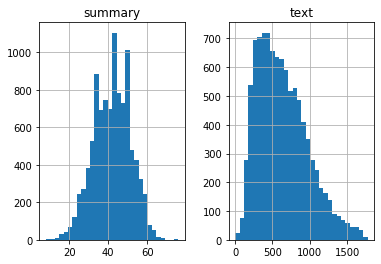

In [23]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in input_texts:
      text_word_count.append(len(str(i).split()))

for i in target_texts:
      summary_word_count.append(len(str(i).split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

In [24]:
print(max(summary_word_count))
print(max(text_word_count))

76
1774


### 2.3 : Select top N samples with specific sequence length threshold

In [25]:

def sub_sample(seq_len_threshold):
    idx = [i for i,v in enumerate(input_texts) if len(v) <= seq_len_threshold]
    input_texts_subsample = [input_texts[i] for i in idx]
    target_texts_subsample = [target_texts[i] for i in idx]
    target_texts_inputs_subsample = [target_texts_inputs[i] for i in idx]
    return input_texts_subsample,target_texts_subsample,target_texts_inputs_subsample 
    
input_texts,target_texts,target_texts_inputs = sub_sample(seq_len_threshold=1200)


In [26]:
print(len(input_texts))
print(len(target_texts))
print(len(target_texts_inputs))

577
577
577


In [27]:
print(input_texts[2])
print(target_texts[2])
print(target_texts_inputs[2])

as barack obama makes his case to the nation for taking the fight to isis his top diplomat is also trying to make sure america doesnt have to go it alone us secretary of state john kerry is sweeping through the middle east to try to convince regional leaders to back americas plan to beat back the terror group which has seized a large chunk of territory stretching from northern syria to central iraq with alarming pace in recent months so whos with them
barack obama making case to nation for increasing military action against isis john kerry in middle east trying to get more of the regions leaders on board germany uk france to offer assistance russia wary of potential us strikes in syria <eos>
<sos> barack obama making case to nation for increasing military action against isis john kerry in middle east trying to get more of the regions leaders on board germany uk france to offer assistance russia wary of potential us strikes in syria


### 2.4 : Tokenize inputs 

In [28]:
tokenizer_inputs = Tokenizer(num_words = MAX_NUM_WORDS)
tokenizer_inputs.fit_on_texts(input_texts)
input_sequences = tokenizer_inputs.texts_to_sequences(input_texts)

In [29]:
print(input_texts[2])
print(" ")
print(input_sequences[2])

as barack obama makes his case to the nation for taking the fight to isis his top diplomat is also trying to make sure america doesnt have to go it alone us secretary of state john kerry is sweeping through the middle east to try to convince regional leaders to back americas plan to beat back the terror group which has seized a large chunk of territory stretching from northern syria to central iraq with alarming pace in recent months so whos with them
 
[18, 1076, 599, 839, 21, 498, 4, 1, 600, 10, 453, 1, 1348, 4, 3216, 21, 256, 2560, 11, 59, 637, 4, 266, 987, 674, 1349, 27, 4, 216, 19, 1779, 47, 840, 3, 113, 257, 2561, 11, 2562, 142, 1, 708, 349, 4, 381, 4, 6180, 762, 988, 4, 166, 1184, 1185, 4, 1077, 166, 1, 1350, 116, 44, 20, 1537, 2, 563, 3217, 3, 1780, 4219, 15, 902, 1351, 4, 383, 384, 14, 3218, 6181, 5, 348, 293, 124, 1781, 14, 134]


In [30]:
print(len(input_texts[2].split()))
print(len(input_sequences[2]))

84
84


In [31]:
#get the word to index mapping for the input language
word2indx_inputs = tokenizer_inputs.word_index
print("Found % unique input tokens" % len(word2indx_inputs))
print("")
print(word2indx_inputs)

Found  12288nique input tokens

{'the': 1, 'a': 2, 'of': 3, 'to': 4, 'in': 5, 'and': 6, 'said': 7, 'was': 8, 'on': 9, 'for': 10, 'is': 11, 'at': 12, 'that': 13, 'with': 14, 'from': 15, 'were': 16, 'he': 17, 'as': 18, 'it': 19, 'has': 20, 'his': 21, 'an': 22, 'this': 23, 'by': 24, 'are': 25, 'after': 26, 'have': 27, 'be': 28, 'will': 29, 'but': 30, 'been': 31, 'police': 32, 'people': 33, 'who': 34, 'her': 35, 'according': 36, 'not': 37, 'one': 38, 'two': 39, 'its': 40, 'she': 41, 'about': 42, 'had': 43, 'which': 44, 'they': 45, 'new': 46, 'us': 47, 'more': 48, 'time': 49, 'all': 50, 'when': 51, 'their': 52, 'i': 53, 'we': 54, 'cnn': 55, 'statement': 56, 'first': 57, 'reported': 58, 'also': 59, 'out': 60, 'told': 61, 'no': 62, 'report': 63, 'into': 64, 'last': 65, 'there': 66, 'or': 67, 'officials': 68, 'up': 69, 'you': 70, 'years': 71, 'than': 72, 'killed': 73, 'what': 74, 'over': 75, 'news': 76, 'three': 77, 'monday': 78, 'authorities': 79, 'cnns': 80, 'contributed': 81, 'million': 82,

In [32]:
#determine max length of input sequence
max_len_input = max(len(s) for s in input_sequences)
max_len_input

228

### 2.5 : Tokenize targets 

In [33]:
tokenizer_targets = Tokenizer(num_words=MAX_NUM_WORDS, filters='')

In [34]:
tokenizer_targets.fit_on_texts(target_texts + target_texts_inputs) ##inefficient
target_sequences = tokenizer_targets.texts_to_sequences(target_texts)
target_sequences_inputs = tokenizer_targets.texts_to_sequences(target_texts_inputs)

In [35]:
print(target_texts[2])
print(" ")
print(target_sequences[2])
print(" ")
print(target_sequences_inputs[2])

barack obama making case to nation for increasing military action against isis john kerry in middle east trying to get more of the regions leaders on board germany uk france to offer assistance russia wary of potential us strikes in syria <eos>
 
[600, 209, 601, 602, 5, 603, 12, 1221, 232, 463, 266, 1222, 233, 1223, 2, 604, 234, 605, 5, 210, 48, 4, 1, 2125, 827, 11, 235, 1224, 310, 606, 5, 1225, 2126, 464, 2127, 4, 1226, 50, 1227, 2, 607, 6]
 
[7, 600, 209, 601, 602, 5, 603, 12, 1221, 232, 463, 266, 1222, 233, 1223, 2, 604, 234, 605, 5, 210, 48, 4, 1, 2125, 827, 11, 235, 1224, 310, 606, 5, 1225, 2126, 464, 2127, 4, 1226, 50, 1227, 2, 607]


In [36]:
print(len(target_texts[2].split()))
print(len(target_sequences[2]))
print(len(target_sequences_inputs[2]))

42
42
42


In [37]:
## get the word to index mapping for the output language
word2indx_outputs = tokenizer_targets.word_index
print('Found %s unique output tokens.' % len(word2indx_outputs))
print("")
print(word2indx_outputs)

Found 5217 unique output tokens.

{'the': 1, 'in': 2, 'a': 3, 'of': 4, 'to': 5, '<eos>': 6, '<sos>': 7, 'and': 8, 'is': 9, 'was': 10, 'on': 11, 'for': 12, 'says': 13, 'at': 14, 'with': 15, 'has': 16, 'are': 17, 'were': 18, 'from': 19, 'will': 20, 'an': 21, 'say': 22, 'new': 23, 'he': 24, 'police': 25, 'his': 26, 'been': 27, 'her': 28, 'as': 29, 'it': 30, 'two': 31, 'have': 32, 'by': 33, 'be': 34, 'people': 35, 'after': 36, 'this': 37, 'its': 38, 'had': 39, 'first': 40, 'one': 41, 'not': 42, 'killed': 43, 'that': 44, 'she': 45, 'about': 46, 'they': 47, 'more': 48, 'no': 49, 'us': 50, 'cnn': 51, 'official': 52, 'three': 53, 'news': 54, 'officials': 55, 'out': 56, 'found': 57, 'said': 58, 'man': 59, 'who': 60, 'injured': 61, 'show': 62, 'but': 63, 'hospital': 64, 'some': 65, 'than': 66, 'reports': 67, 'when': 68, 'years': 69, 'fire': 70, 'also': 71, 'year': 72, 'president': 73, 'their': 74, 'attack': 75, 'your': 76, 'up': 77, 'over': 78, 'last': 79, 'use': 80, 'city': 81, 'plane': 82, 'di

In [38]:
## store number of output words for later, add 1 as the indexing start at 1
num_words_output = len(word2indx_outputs) + 1 
num_words_output

5218

In [39]:
#determine maximum length of output sequence
max_len_target = max(len(s) for s in target_sequences)
max_len_target

65

### 2.6 : Pad sequences 

In [40]:
encoder_inputs = pad_sequences(input_sequences, maxlen= max_len_input)
print("encoder_inputs shape:", encoder_inputs.shape)
print("encoder_inputs[0]:", encoder_inputs[0])

encoder_inputs shape: (577, 228)
encoder_inputs[0]: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    2  495 1343    8    5  835  406
   26    2  559 3210   35  431 1183  122   41 6162    5 1344    9   94
   79    7    1 1345  195   34    8 4210   51   57 4211  707    8  199
    4 2554  560  273   10  635   36  760 6163   14    1 2554  101  152
  559   92    9   46  207 3211  335    1  146  156  179   42  984 4212
   12  473  380  836    5 2554    1  836   20   31  761   38 1772    9
 1530  451    3  112    1  146  496   68   29 6164    9  102  208  535
    1  836  133   28 2555  559  146  985 1531 3212  265   23  559  146
   11    1  561    5 2554   23   85   14   39 3213    9    1  284  147
    5  358    6    1   86

In [41]:
decoder_inputs = pad_sequences(target_sequences_inputs, maxlen= max_len_target, padding='post')
print("decoder_inputs shape:", decoder_inputs.shape)
print("decoder_inputs[0]:", decoder_inputs[0])

decoder_inputs shape: (577, 65)
decoder_inputs[0]: [   7   37    9    1  460  823   75    2 2110   37   72   30   96   92
   46 2111 2112   55   20 1214  207  308    1  461  265 1215    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


In [42]:
decoder_targets = pad_sequences(target_sequences, maxlen= max_len_target, padding='post')
print("decoder_targets shape:", decoder_targets.shape)
print("decoder_targets[0]:", decoder_targets[0])

decoder_targets shape: (577, 65)
decoder_targets[0]: [  37    9    1  460  823   75    2 2110   37   72   30   96   92   46
 2111 2112   55   20 1214  207  308    1  461  265 1215    6    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


### 2.7 : Read and prepare 'glove.6B' Embedding file 

In [43]:
## store all the pre-trained word vectors. the source file is a space separated file. save vectors to dictionary
print("loading word vectors.....")
word2vec = {}
with open(os.path.join(workdir, "Data", "glove.6B/glove.6B.%sd.txt" % EMBEDDING_DIM), encoding='utf') as f:
    ## word vec[0], word vec[1], word vec[2] .....
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vector
print('Found %s word vectors.' % len(word2vec))
    

loading word vectors.....
Found 400000 word vectors.


### 2.8 : Prepare embedding matrix (Vocab_Size x D) 

In [44]:
print("Filling pre-trained embeddings.....")
vocab_size = min(MAX_NUM_WORDS, len(word2indx_inputs) + 1)
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, indx in word2indx_inputs.items():
    if indx < MAX_NUM_WORDS:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
            embedding_matrix[indx] = embedding_vector
            
print(embedding_matrix[1:2])

Filling pre-trained embeddings.....
[[ 4.65600006e-02  2.13180006e-01 -7.43639981e-03 -4.58539993e-01
  -3.56389992e-02  2.36430004e-01 -2.88360000e-01  2.15210006e-01
  -1.34859994e-01 -1.64129996e+00 -2.60910004e-01  3.24340016e-02
   5.66210002e-02 -4.32960019e-02 -2.16719992e-02  2.24759996e-01
  -7.51290023e-02 -6.70180023e-02 -1.42470002e-01  3.88250016e-02
  -1.89510003e-01  2.99769998e-01  3.93049985e-01  1.78870007e-01
  -1.73429996e-01 -2.11779997e-01  2.36169994e-01 -6.36809990e-02
  -4.23180014e-01 -1.16609998e-01  9.37540010e-02  1.72959998e-01
  -3.30729991e-01  4.91120011e-01 -6.89949989e-01 -9.24620032e-02
   2.47419998e-01 -1.79910004e-01  9.79079977e-02  8.31179991e-02
   1.52989998e-01 -2.72760004e-01 -3.89339998e-02  5.44529974e-01
   5.37370026e-01  2.91049987e-01 -7.35139987e-03  4.78800014e-02
  -4.07599986e-01 -2.67590005e-02  1.79189995e-01  1.09770000e-02
  -1.09630004e-01 -2.63949990e-01  7.39900023e-02  2.62360007e-01
  -1.50800005e-01  3.46230000e-01  2.575

### 2.9 : Create targets  for decoder (as the sparse _categorical_crossentropy expects in one-hot encoding) 

In [45]:
decoder_targets_one_hot = np.zeros(
  (
    len(input_texts),
    max_len_target,
    num_words_output
  ),
  dtype='float32'
)

# assign the values
for i, d in enumerate(decoder_targets):
    for t, word in enumerate(d):
        if word != 0:
            decoder_targets_one_hot[i, t, word] = 1
            
decoder_targets_one_hot[1]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Part 3 : Model Architecture, Model Train & Evaluation 

### 3.1 : Create embedding layer 

In [49]:
embedding_layer = Embedding(vocab_size, 
                            EMBEDDING_DIM, 
                            weights=[embedding_matrix], 
                            input_length = max_len_input, 
                            trainable=False)

### 3.2 : Create custom layer for Bahdanau Attention 

In [47]:

from tensorflow.keras import backend as K
from tensorflow.keras.layers import Layer
from tensorflow.keras import initializers, regularizers, constraints

class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(shape=(input_shape[-1],1),initializer="normal", name="att_weight")
        self.b=self.add_weight(shape=(input_shape[1],1),initializer="zeros",name="att_bias")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

### 3.3 : Building Model for training

In [53]:
## building encoder part
encoder_input_    = Input((max_len_input,))
encoder_embedding = embedding_layer(encoder_input_)

## bidirectional with different dropouts
encoder_LSTM           = LSTM(LATENT_DIM, return_state=True, return_sequences=True,dropout=0.2)
encoder_LSTM_rev       = LSTM(LATENT_DIM,return_state=True,return_sequences=True,dropout=0.05,go_backwards=True)

encoder_output_, encoder_h, encoder_c = encoder_LSTM(encoder_embedding)
encoder_output_r, encoder_hr, encoder_cr = encoder_LSTM_rev(encoder_embedding)

encoder_h_final = Add()([encoder_h, encoder_hr])
encoder_c_final = Add()([encoder_c, encoder_cr])
encoder_output_final = Add()([encoder_output_, encoder_output_r])

##keep only the states to pass to the decoder
encoder_states    = [encoder_h_final, encoder_c_final]

## building decoder; using encoder_states as initial state
decoder_input_    = Input((max_len_target,))
decoder_embedding = Embedding(num_words_output, EMBEDDING_DIM)
decoder_embedding_x = decoder_embedding(decoder_input_)
decoder_lstm      = LSTM(LATENT_DIM, return_state=True, return_sequences=True, dropout=0.2)
decoder_output_, decoder_h, decoder_c = decoder_lstm(decoder_embedding_x, initial_state=encoder_states)

##attention
atten = attention()(encoder_output_final)
decoder_output_final = Add()([decoder_output_, atten])

decoder_dense     = Dense(num_words_output, activation='softmax')
decoder_output_   = decoder_dense(decoder_output_final)

model = Model(inputs= [encoder_input_, decoder_input_], outputs = decoder_output_)

model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 228)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 228, 300)     3686700     input_3[0][0]                    
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 65)]         0                                            
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 228, 128), ( 219648      embedding[1][0]                  
______________________________________________________________________________________________

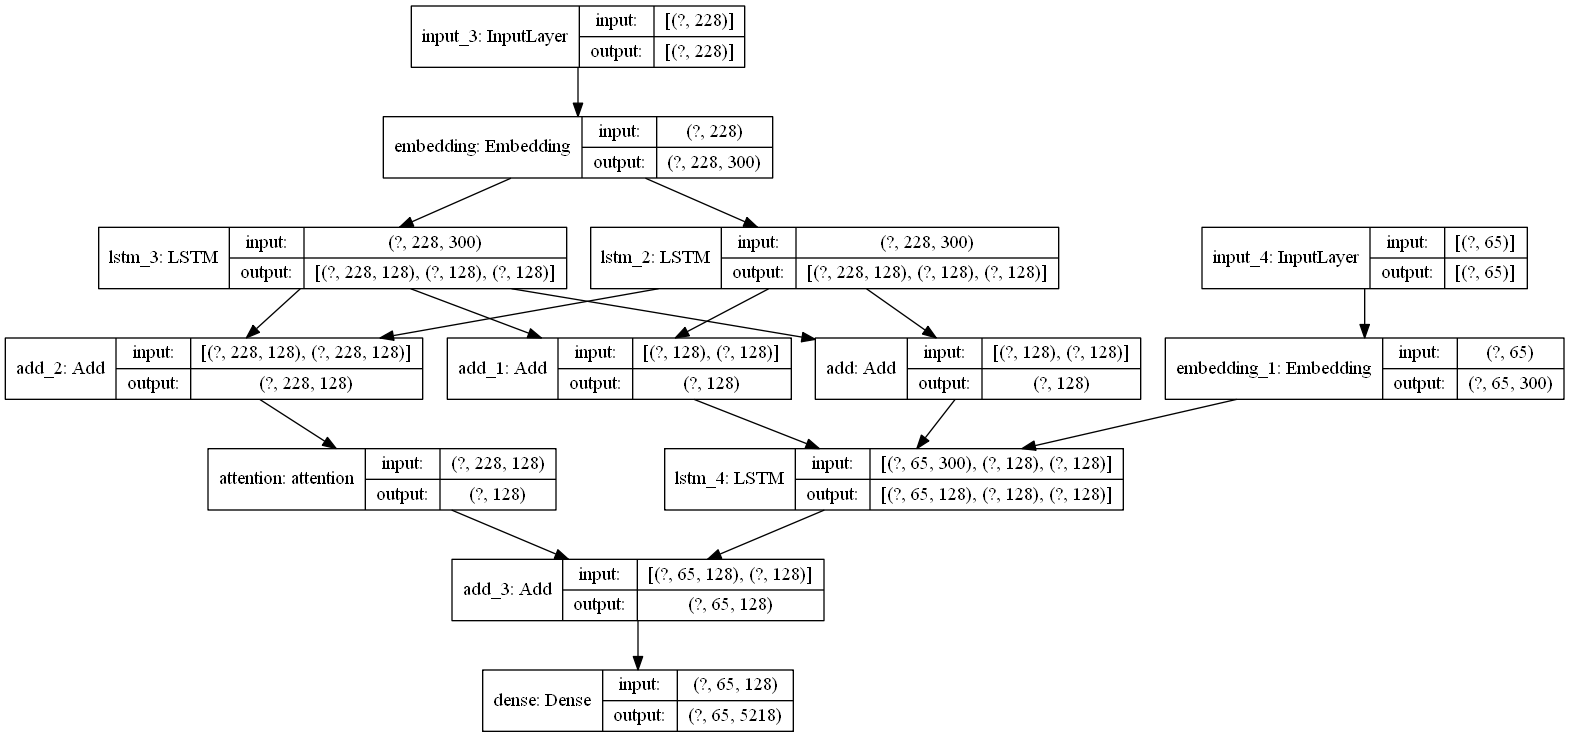

In [55]:
plot_model(model, to_file=os.path.join(workdir, "Outputs", 'model_plot.png'), show_shapes=True, show_layer_names=True)

In [56]:
## define custom loss
def custom_loss(y_true, y_pred):
  # both are of shape N x T x K
  mask = K.cast(y_true > 0, dtype='float32')
  out = mask * y_true * K.log(y_pred)
  return -K.sum(out) / K.sum(mask)

## define custom accuracy
def acc(y_true, y_pred):
  # both are of shape N x T x K
  targ = K.argmax(y_true, axis=-1)
  pred = K.argmax(y_pred, axis=-1)
  correct = K.cast(K.equal(targ, pred), dtype='float32')

  # 0 is padding, don't include those
  mask = K.cast(K.greater(targ, 0), dtype='float32')
  n_correct = K.sum(mask * correct)
  n_total = K.sum(mask)
  return n_correct / n_total

## compile model
model.compile(optimizer='adam', loss=custom_loss, metrics= [acc])

In [57]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [58]:
## initialize tensorboard
logdir = os.path.join(workdir, "Outputs", "logs\logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard = TensorBoard(log_dir = logdir, histogram_freq=1, write_images=True)

In [59]:
## train the model
r = model.fit([ encoder_inputs, decoder_inputs], 
                 decoder_targets_one_hot, 
                 batch_size       = BATCH_SIZE,
                 epochs           = EPOCHS,
                 validation_split = VALIDATION_SPLIT,
                 callbacks        = [tensorboard])

Train on 461 samples, validate on 116 samples
Epoch 1/50
461/461 [==============================] - 32s 70ms/sample - loss: 8.4650 - acc: 0.0178 - val_loss: 8.1261 - val_acc: 0.0276
Epoch 2/50
461/461 [==============================] - 27s 59ms/sample - loss: 7.5757 - acc: 0.0256 - val_loss: 7.5558 - val_acc: 0.0336
Epoch 3/50
461/461 [==============================] - 28s 61ms/sample - loss: 7.1207 - acc: 0.0459 - val_loss: 7.6931 - val_acc: 0.0526
Epoch 4/50
461/461 [==============================] - 28s 61ms/sample - loss: 7.0198 - acc: 0.0523 - val_loss: 7.7047 - val_acc: 0.0526
Epoch 5/50
461/461 [==============================] - 31s 66ms/sample - loss: 7.0035 - acc: 0.0504 - val_loss: 7.7675 - val_acc: 0.0526
Epoch 6/50
461/461 [==============================] - 29s 63ms/sample - loss: 6.9790 - acc: 0.0496 - val_loss: 7.8193 - val_acc: 0.0526
Epoch 7/50
461/461 [==============================] - 28s 60ms/sample - loss: 6.9588 - acc: 0.0515 - val_loss: 7.8101 - val_acc: 0.0526
Ep

In [60]:
model.save(os.path.join(workdir, "Outputs",'base_model_1.h5'))

In [74]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 14196), started 0:09:15 ago. (Use '!kill 14196' to kill it.)

In [69]:
## we need to create another model that takes the RNN states from encoder and previous word as input and accept a T=1 sequence

##the encoder will be standalone, from this we will get the hidden states
encoder_model = Model(encoder_input_, encoder_states)

decoder_input_h = Input(shape=(LATENT_DIM,))
decoder_input_c = Input(shape=(LATENT_DIM,))

decoder_states_input_ = [decoder_input_h, decoder_input_c] 

decoder_input_single = Input(shape=(1,))
decoder_input_single_embedding = decoder_embedding(decoder_input_single)

decoder_outputs, decoder_h, decoder_c = decoder_lstm(decoder_input_single_embedding, initial_state=decoder_states_input_)

decoder_states = [decoder_h, decoder_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = Model([decoder_input_single] + decoder_states_input_,
                     [decoder_outputs] + decoder_states)


print("The encoder model")
encoder_model.summary()
print("")
print("The decoder model")
decoder_model.summary()
print("")

The encoder model
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 228)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 228, 300)     3686700     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_2 (LSTM)                   [(None, 228, 128), ( 219648      embedding[1][0]                  
__________________________________________________________________________________________________
lstm_3 (LSTM)                   [(None, 228, 128), ( 219648      embedding[1][0]                  
__________________________________________________________________________

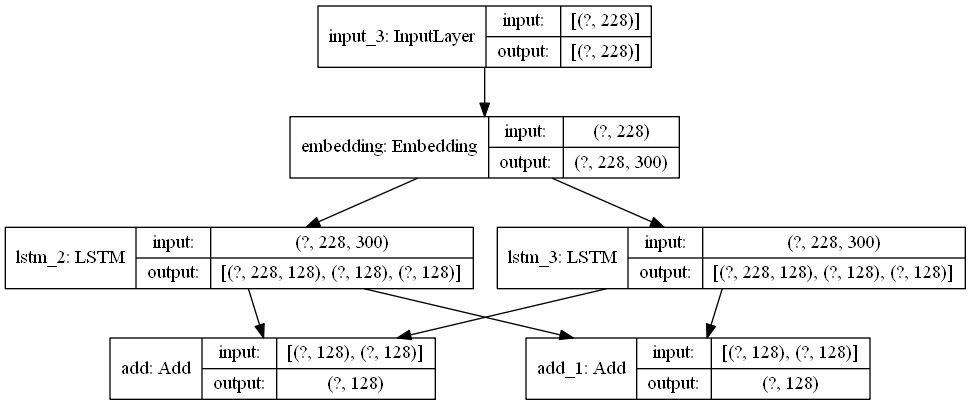

In [70]:
plot_model(encoder_model, to_file=os.path.join(workdir, 'Outputs','encoder_model_plot.png'), show_shapes=True, show_layer_names=True)

### Map indexes back to the real words 

In [71]:
indx2word_inputs= {v:k for k, v in word2indx_inputs.items()}
indx2word_outputs = {v:k for k, v in word2indx_outputs.items()}

In [72]:

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1))

    # Populate the first character of target sequence with the start character.
    # NOTE: tokenizer lower-cases all words
    target_seq[0, 0] = word2indx_outputs['<sos>']

    # if we get this we break
    eos = word2indx_outputs['<eos>']

    # Create the translation
    output_sentence = []
    for _ in range(max_len_target):
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Get next word
        idx = np.argmax(output_tokens[0, 0, :])

        # End sentence of EOS
        if eos == idx:
            break

        word = ''
        if idx > 0:
            word = indx2word_outputs[idx]
            output_sentence.append(word)

        # Update the decoder input
        # which is just the word just generated
        target_seq[0, 0] = idx

        # Update states
        states_value = [h, c]
        # states_value = [h] # gru

    return ' '.join(output_sentence)



In [73]:
while True:
    # Do some test translations
    i = np.random.choice(len(input_texts))
    input_seq = encoder_inputs[i:i+1]
    summary = decode_sequence(input_seq)
    print('-')
    print('Input:', input_texts[i])
    print('summary:', summary)

    ans = input("Continue? [Y/n]")
    if ans and ans.lower().startswith('n'):
        break

-
Input: wolfsburg striker edin dzeko expects to play for ac milan next season the bosnian international whose goals last season inspired the wolves to the bundesliga title has already informed his club he intends to move to the san siro outfit i recently spoke to wolfsburg executives about it and they know that i would like a transfer next summer dzeko told gazzetta dello sport the story with ac milan is not over dzeko was strongly linked with the rossoneri last summer but despite ac milan holding talks with the bundesliga side wolfsburg refused to sell their top player the who also attracted interest from manchester united insists his dream is to play with the serie a giants manchester united have also shown an interest but i have been a fan of milan since i was a child when i watched their games on tv its for that reason that i really hope i can play next season there dzeko is under contract with the german side until june
summary: the daily the daily of the claims of the sets of th